In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Read the Military expenditure excel worksheet which has multiple sheets.

sipri = pd.ExcelFile("D:\Fall 2017\Intro to Data Mining\Project_1\data_military expenditure\SIPRI-Milex-data-1949-2016.xlsx")
print(sipri.sheet_names)

['Front page', 'Regional totals', 'Local currency financial years', 'Local currency calendar years', 'Constant (2015) USD', 'Current USD', 'Share of GDP', 'Per capita', 'Share of Govt. spending', 'Footnotes']


In [3]:
# read the CURRENT USD sheet and remove the top header lines and footer lines
curr_USD = sipri.parse('Current USD', skiprows = 5,skip_footer=8)

#Since the year columns are in digits, it is easier to access these columns if converted to string
curr_USD.columns = curr_USD.columns.astype(str)

#select the required columns 5 years : 2012-2016
reqd = curr_USD.iloc[:, np.r_[0,curr_USD.columns.get_loc("2012"):curr_USD.columns.get_loc("2016")+1 ]]
reqd.head()

#removing garbage values from the data frame
reqd = reqd[reqd!=". ."]
reqd = reqd[reqd!="xxx"]

#removing rows if NA is present anywhere
final = reqd.dropna(axis=0, how='any')

#convert all column values to float ignoring the Country column
final = final.apply(pd.to_numeric, errors='ignore')

#Sorting by counrtry in ascending order
final = final.sort_values(by='Country', ascending = True)
final.head(20)

,Country,2012,2013,2014,2015,2016
99,Afghanistan,238.583385,217.194107,268.227074,199.518615,173.598862
124,Albania,183.204696,180.015509,178.120368,132.350668,146.603857
2,Algeria,9326.287144,10161.588239,9724.379972,10412.714003,10217.081700
7,Angola,4144.634851,6090.751702,6841.864484,3608.290786,2824.260247
73,Argentina,4563.217859,5137.974301,4979.442724,5482.616701,5209.264101
145,Armenia,380.571679,444.551860,457.807022,447.379808,431.396219
118,Australia,26216.580848,24825.262589,25783.708714,24040.310047,24616.898812
154,Austria,3187.227449,3229.065841,3305.159256,2665.409782,2861.728254
146,Azerbaijan,3246.122613,3367.574161,3427.179917,3020.849288,1378.917820
175,Bahrain,1182.180851,1347.606383,1475.265957,1442.021277,1429.920213


In [4]:
#type(curr_USD)

#column types
#curr_USD.dtypes

#number of rows & columns
#curr_USD.shape

#column names
#curr_USD.columns

In [5]:
#final.shape
#final.dtypes
#type(final)

In [6]:
#create a TOTAL column that sums the military expenditure of each country from 2012-2016
final['Total'] = final.sum(axis = 1)

final = final.sort_values(by='Total', ascending = False)

# the final dataset contains military expenditures of all available countries 
#from 2012 to 2016 with their total for 5 years in a descending order of total column
final.head()

,Country,2012,2013,2014,2015,2016,Total
71,USA,684780.000000,639704.000000,609914.000000,596009.639000,611186.443000,3.141594e+06
92,"China, P.R.",157390.377246,179880.451358,200772.203840,214093.069946,215175.930112,9.673120e+05
150,Russian Federation,81469.399931,88352.896464,84696.504653,66418.708184,69245.309461,3.901828e+05
185,Saudi Arabia,56497.866667,67020.000000,80762.400000,87185.866667,63672.800000,3.551389e+05
159,France,60035.153811,62417.099178,63613.569143,55342.131529,55745.475500,2.971534e+05


In [7]:
# Calculate the total military expenditure of all available countires in any year : 

def total(year):
    year = str(year)
    ans = np.round(np.sum(final[year], axis = 0 ), decimals = 2)
    print("The total military expenditure of all available countries in %s is %f " % (year,ans) )
    return ans

total(2016)

The total military expenditure of all available countries in 2016 is 1641007.500000 


1641007.5

In [8]:
#Pick the top 10 countries who have spent the most on military expenditures from 2012 to 2016
top10 = final.nlargest(10, 'Total')
top10

,Country,2012,2013,2014,2015,2016,Total
71,USA,684780.000000,639704.000000,609914.000000,596009.639000,611186.443000,3.141594e+06
92,"China, P.R.",157390.377246,179880.451358,200772.203840,214093.069946,215175.930112,9.673120e+05
150,Russian Federation,81469.399931,88352.896464,84696.504653,66418.708184,69245.309461,3.901828e+05
185,Saudi Arabia,56497.866667,67020.000000,80762.400000,87185.866667,63672.800000,3.551389e+05
159,France,60035.153811,62417.099178,63613.569143,55342.131529,55745.475500,2.971534e+05
173,UK,58495.656721,56861.759588,59182.858554,53862.185493,48252.518238,2.766550e+05
101,India,47216.920048,47403.528801,50914.108341,51295.483754,55923.169804,2.527532e+05
93,Japan,60011.530195,49023.932407,46634.511062,41103.226466,46126.327551,2.428995e+05
160,Germany,46470.870905,45930.540563,46102.673010,39812.576245,41067.464816,2.193841e+05
95,"Korea, South",31951.760810,34354.112435,37286.221699,36432.680683,36776.733458,1.768015e+05


In [9]:
#renaming country names
top10 = top10.replace({'Russian Federation': 'Russia', 'Korea, South':'South Korea', 'China, P.R.':'China'})

# Rounding the values to two decimal places across all columns
top10 = np.round(top10, decimals=2)

#Change the index column to reflect top 10
top10.index = range(len(top10))

#This table shows the top 10 countries who have spent the most in military expenditures from the years 2012 to 2016:
top10


,Country,2012,2013,2014,2015,2016,Total
0,USA,684780.00,639704.00,609914.00,596009.64,611186.44,3141594.08
1,China,157390.38,179880.45,200772.20,214093.07,215175.93,967312.03
2,Russia,81469.40,88352.90,84696.50,66418.71,69245.31,390182.82
3,Saudi Arabia,56497.87,67020.00,80762.40,87185.87,63672.80,355138.93
4,France,60035.15,62417.10,63613.57,55342.13,55745.48,297153.43
5,UK,58495.66,56861.76,59182.86,53862.19,48252.52,276654.98
6,India,47216.92,47403.53,50914.11,51295.48,55923.17,252753.21
7,Japan,60011.53,49023.93,46634.51,41103.23,46126.33,242899.53
8,Germany,46470.87,45930.54,46102.67,39812.58,41067.46,219384.13
9,South Korea,31951.76,34354.11,37286.22,36432.68,36776.73,176801.51


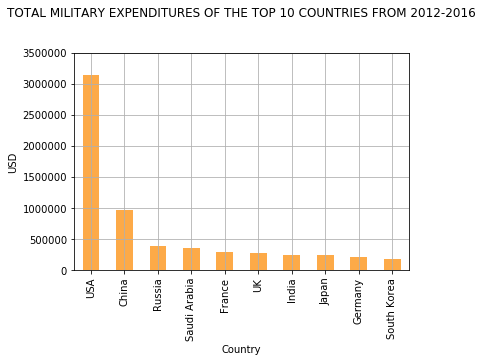

In [10]:
# TOTAL MILITARY SPENDINGS OF THE TOP 10 NATIONS FROM 2012-2016
top10.plot(x="Country", y="Total", kind="bar", color = "xkcd:light orange", legend = False).set_ylim([0,3500000])
plt.xlabel("Country")
plt.ylabel("USD")
plt.title("TOTAL MILITARY EXPENDITURES OF THE TOP 10 COUNTRIES FROM 2012-2016\n\n")
plt.grid()
plt.show()

In [11]:
#Total value of military expenditure of all the top10 countries from 2012-2016 is

top10_total_5years = np.sum(top10['Total'],axis=0)
top10_total_5years = np.round(top10_total_5years, decimals = 2)

top10_total_5years

6319874.6500000004

In [12]:
# calculate each country's share in the 5 year period
top10['Percent Share'] = np.round((top10['Total'] / top10_total_5years *100),2)
top10

,Country,2012,2013,2014,2015,2016,Total,Percent Share
0,USA,684780.00,639704.00,609914.00,596009.64,611186.44,3141594.08,49.71
1,China,157390.38,179880.45,200772.20,214093.07,215175.93,967312.03,15.31
2,Russia,81469.40,88352.90,84696.50,66418.71,69245.31,390182.82,6.17
3,Saudi Arabia,56497.87,67020.00,80762.40,87185.87,63672.80,355138.93,5.62
4,France,60035.15,62417.10,63613.57,55342.13,55745.48,297153.43,4.70
5,UK,58495.66,56861.76,59182.86,53862.19,48252.52,276654.98,4.38
6,India,47216.92,47403.53,50914.11,51295.48,55923.17,252753.21,4.00
7,Japan,60011.53,49023.93,46634.51,41103.23,46126.33,242899.53,3.84
8,Germany,46470.87,45930.54,46102.67,39812.58,41067.46,219384.13,3.47
9,South Korea,31951.76,34354.11,37286.22,36432.68,36776.73,176801.51,2.80


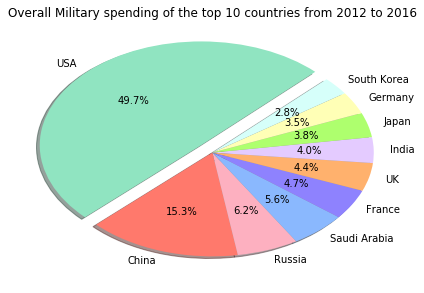

In [13]:
#COMPARING THE OVERALL MILITARY SPENDING OF THE TOP 10 COUNTRIES FROM 2012 TO 2016

colors = ['xkcd:light teal','xkcd:salmon', 'xkcd:soft pink', 
          'xkcd:carolina blue' , 'xkcd:periwinkle', 'xkcd:apricot', 
          'xkcd:pale lilac', 'xkcd:key lime', 'xkcd:creme', 'xkcd:ice']

#PLOTTING PERCENT SHARE OF ALL COUNTRIES FROM 2012-2016
plt.pie(
        top10['Percent Share'],
        labels=top10['Country'],
        shadow=True,
        colors=colors,
        explode=(0.1, 0, 0, 0, 0,0,0,0,0,0),
        startangle=45,
        autopct='%1.1f%%'
        )

plt.tight_layout()
plt.title("Overall Military spending of the top 10 countries from 2012 to 2016")
plt.show()

                   2012       2013       2014       2015       2016
Country                                                            
USA           684780.00  639704.00  609914.00  596009.64  611186.44
China         157390.38  179880.45  200772.20  214093.07  215175.93
Russia         81469.40   88352.90   84696.50   66418.71   69245.31
Saudi Arabia   56497.87   67020.00   80762.40   87185.87   63672.80
France         60035.15   62417.10   63613.57   55342.13   55745.48
UK             58495.66   56861.76   59182.86   53862.19   48252.52
India          47216.92   47403.53   50914.11   51295.48   55923.17
Japan          60011.53   49023.93   46634.51   41103.23   46126.33
Germany        46470.87   45930.54   46102.67   39812.58   41067.46
South Korea    31951.76   34354.11   37286.22   36432.68   36776.73


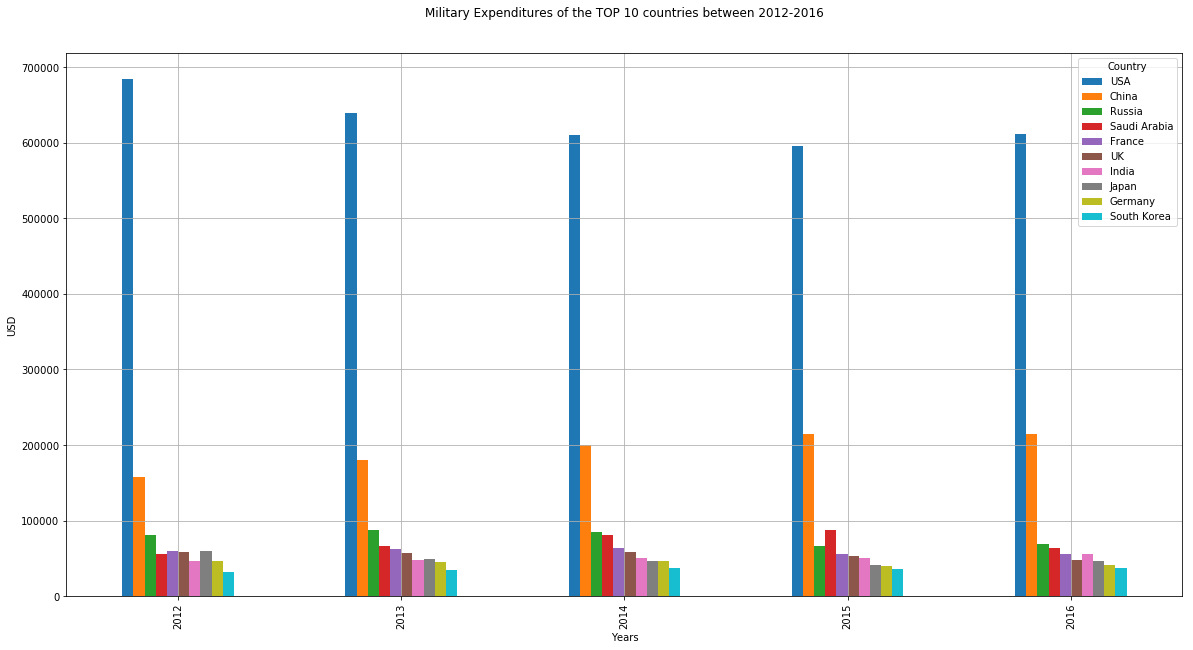

In [14]:
#MILITARY EXPENDITURES OF THE TOP 10 COUNTRIES FROM 2012 TO 2016

tot_exp = top10.filter(['Country', '2012','2013','2014', '2015', '2016'], axis=1)
tot_exp = tot_exp.set_index("Country")
print(tot_exp)

tot_exp.T.plot(kind='bar', figsize = (20,10),title='Military Expenditures of the TOP 10 countries between 2012-2016\n\n')
plt.ylabel("USD")
plt.xlabel("Years")
plt.grid()
plt.show()

In [15]:
# get the names of the top 10 countries from 2012-2016

top10_countries = pd.DataFrame(top10['Country'])
top10_countries = top10_countries.sort_values('Country')
top10_countries = top10_countries.set_index('Country')

top10_countries

""
Country
China
France
Germany
India
Japan
Russia
Saudi Arabia
South Korea
UK


In [16]:
##########################################################################################
######### MILITARY SPENDINGS AS A % OF GDP
##########################################################################################

# read the Share of GDP sheet and remove the top header and footer lines
sipri_ShareofGDP = sipri.parse('Share of GDP', skiprows = 5, skip_footer = 8)
sipri_ShareofGDP.head()

,Country,Notes,1949,1950,1951,1952,1953,1954,1955,1956,...,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,North Africa,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Algeria,1,xxx,xxx,xxx,xxx,xxx,xxx,xxx,xxx,...,0.0292332,0.0302475,0.0384851,0.0351801,0.0432584,0.0446133,0.0484385,0.05544,0.063159,0.0666286
3,Libya,‡ ¶ 2,xxx,xxx,. .,. .,. .,. .,. .,. .,...,0.0087061,0.0115398,. .,. .,. .,0.0333945,0.0549634,0.0780526,. .,. .
4,Morocco,3,xxx,xxx,xxx,xxx,xxx,xxx,xxx,0.0118065,...,0.0304695,0.031835,0.0328865,0.033908,0.032975,0.0346275,0.0379125,0.0368027,0.0324522,0.032042


In [17]:
sipri_ShareofGDP.columns = sipri_ShareofGDP.columns.astype(str)
sipri_ShareofGDP = sipri_ShareofGDP.filter(['Country', '2012','2013','2014', '2015', '2016'], axis=1)
sipri_ShareofGDP = sipri_ShareofGDP.replace({'Russian Federation':'Russia', 'Korea, South': 'South Korea', 'China, P.R.':'China'})

#setting index as country to subset 
sipri_ShareofGDP = sipri_ShareofGDP.set_index('Country')
sipri_ShareofGDP.head()

,2012,2013,2014,2015,2016
Country,,,,,
Africa,NaN,NaN,NaN,NaN,NaN
North Africa,NaN,NaN,NaN,NaN,NaN
Algeria,0.0446133,0.0484385,0.05544,0.063159,0.0666286
Libya,0.0333945,0.0549634,0.0780526,. .,. .
Morocco,0.0346275,0.0379125,0.0368027,0.0324522,0.032042


In [18]:
#subsetting top 10 countries using the top10_countries

sipri_ShareofGDP_top10 = sipri_ShareofGDP[sipri_ShareofGDP.index.isin(top10_countries.index)]

#convert all columns to float except country
sipri_ShareofGDP_top10 = np.round(sipri_ShareofGDP_top10.apply(pd.to_numeric, errors='ignore'),6)

# mulitply all year columns with 100 to get percentages
for i in sipri_ShareofGDP_top10.iloc[:,0:5]:
    sipri_ShareofGDP_top10[i] = np.round(sipri_ShareofGDP_top10[i]*100 , 2)

sipri_ShareofGDP_top10

,2012,2013,2014,2015,2016
Country,,,,,
USA,4.24,3.83,3.51,3.30,3.29
China,1.86,1.89,1.92,1.94,1.93
Japan,1.01,0.99,1.01,0.99,0.99
South Korea,2.61,2.63,2.64,2.64,2.65
India,2.54,2.46,2.49,2.42,2.50
Russia,3.99,4.20,4.52,4.90,5.32
France,2.24,2.22,2.24,2.29,2.27
Germany,1.32,1.23,1.20,1.19,1.19
UK,2.24,2.12,2.01,1.89,1.86


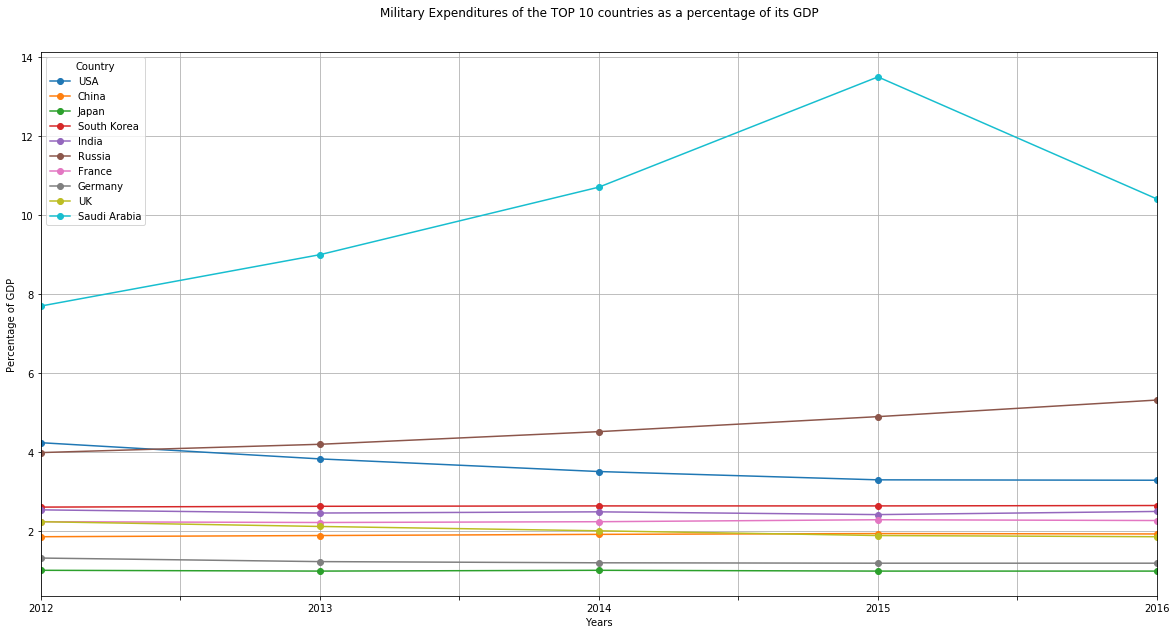

In [19]:
##############################################   MILITARY EXPENDITURE OF TOP 10 COUNTRIES AS A % OF ITS GDP
sipri_ShareofGDP_top10.T.plot(kind='line', figsize = (20,10), 
                              marker='o', 
                              title='Military Expenditures of the TOP 10 countries as a percentage of its GDP\n\n')
plt.ylabel("Percentage of GDP")
plt.xlabel("Years")
plt.grid()
plt.show()

In [20]:
############################################################################################################################
##################################### COMPARING PER CAPITA GDP VS PER CAPITA MILITARY SPENDINGS
############################################################################################################################

In [21]:
##################################### PER CAPITA GDP OF THE TOP 10 COUNTIRES FROM 2012-2016 ########################################

#LOAD THE PER CAPITA GDP FILE
file = pd.ExcelFile("D:\Fall 2017\Intro to Data Mining\Project_1\data_GDP per capita (current US$)\API_NY.GDP.PCAP.CD_DS2_en_excel_v2.xls")

# read the DATA sheet and remove the top header lines
per_capita_gdp = file.parse('Data', skiprows = 3)

#convert column headers to strings
per_capita_gdp.columns = per_capita_gdp.columns.astype(str)

#select the required columns 5 years : 2012-2016
per_capita_gdp = per_capita_gdp.iloc[:, np.r_[0,per_capita_gdp.columns.get_loc("2012"):per_capita_gdp.columns.get_loc("2016")+1 ]]

per_capita_gdp = per_capita_gdp.rename(columns = {'Country Name': 'Country'})

#rename the country names
per_capita_gdp = per_capita_gdp.replace({'United States': 'USA', 'Russian Federation':'Russia', 'United Kingdom': 'UK', 'Korea, Rep.': 'South Korea'})

#setting index as country to subset 
per_capita_gdp = per_capita_gdp.set_index('Country')

#subsetting the top 10 countries
per_capita_gdp_top10 = per_capita_gdp[per_capita_gdp.index.isin(top10_countries.index)]

#reset the index
per_capita_gdp_top10 = per_capita_gdp_top10.reset_index()

#convert all columns to float except country
per_capita_gdp_top10 = np.round(per_capita_gdp_top10.apply(pd.to_numeric, errors='ignore'),2)

per_capita_gdp_top10 = per_capita_gdp_top10.sort_values('Country')

per_capita_gdp_top10


,Country,2012,2013,2014,2015,2016
0,China,6337.88,7077.77,7683.50,8069.21,8123.18
2,France,40838.02,42554.12,42955.24,36526.77,36854.97
1,Germany,44065.25,46530.91,47902.65,41176.88,41936.06
4,India,1446.99,1452.20,1573.12,1613.19,1709.39
5,Japan,48603.48,40454.45,38096.21,34474.14,38894.47
7,Russia,15154.46,15543.68,14125.91,9329.30,8748.36
8,Saudi Arabia,25303.09,24934.39,24575.40,20732.86,20028.65
6,South Korea,24358.78,25890.02,27811.37,27105.08,27538.81
3,UK,41538.31,42407.37,46412.12,43929.69,39899.39
9,USA,51450.12,52787.03,54598.55,56207.04,57466.79


In [22]:
################################### PER CAPITA MILITARY SPENDINGS OF THE TOP 10 COUNTRIES FROM 2012-2016 ########################################

# read the per capita sheet and remove the top header and footer lines
sipri_percapita = sipri.parse('Per capita', skiprows = 6, skip_footer = 7)

sipri_percapita.columns = sipri_percapita.columns.astype(str)

sipri_percapita = sipri_percapita.filter(['Country', '2012','2013','2014', '2015', '2016'], axis=1)

sipri_percapita = sipri_percapita.replace({'USSR/Russia':'Russia', 'Korea, South': 'South Korea', 'China, P.R.':'China'})

#setting index as country to subset 
sipri_percapita = sipri_percapita.set_index('Country')

#subsetting data for the top10 countries
sipri_percapita_top10 = sipri_percapita[sipri_percapita.index.isin(top10_countries.index)]

sipri_percapita_top10 = sipri_percapita_top10.reset_index()


#convert all columns to float except country
sipri_percapita_top10 = np.round(sipri_percapita_top10.apply(pd.to_numeric, errors='ignore'),2)

sipri_percapita_top10 = sipri_percapita_top10.sort_values('Country')

sipri_percapita_top10


,Country,2012,2013,2014,2015,2016
1,China,116.12,132.02,146.61,155.59,155.74
6,France,944.52,977.64,992.08,859.41,862.36
7,Germany,577.44,570.10,571.67,493.41,509.33
4,India,37.37,37.05,39.31,39.13,42.14
2,Japan,472.01,386.06,367.80,324.74,365.40
5,Russia,568.57,616.27,590.51,462.99,483.11
9,Saudi Arabia,1915.44,2219.13,2614.81,2764.26,1978.19
3,South Korea,644.08,689.19,744.62,724.40,728.80
8,UK,920.12,889.08,919.97,832.29,741.31
0,USA,2175.29,2017.13,1909.27,1852.26,1886.16


        Country     G2012    M2012
0         China   6337.88   116.12
1        France  40838.02   944.52
2       Germany  44065.25   577.44
3         India   1446.99    37.37
4         Japan  48603.48   472.01
5        Russia  15154.46   568.57
6  Saudi Arabia  25303.09  1915.44
7   South Korea  24358.78   644.08
8            UK  41538.31   920.12
9           USA  51450.12  2175.29


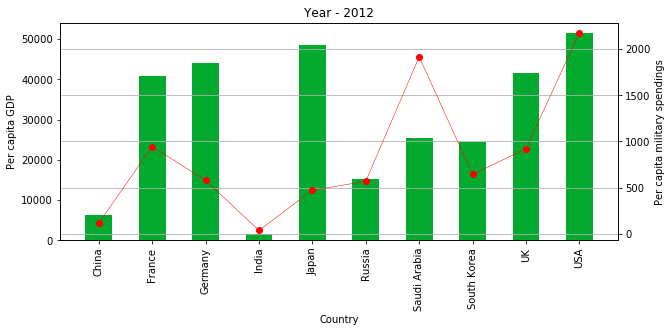

        Country     G2013    M2013
0         China   7077.77   132.02
1        France  42554.12   977.64
2       Germany  46530.91   570.10
3         India   1452.20    37.05
4         Japan  40454.45   386.06
5        Russia  15543.68   616.27
6  Saudi Arabia  24934.39  2219.13
7   South Korea  25890.02   689.19
8            UK  42407.37   889.08
9           USA  52787.03  2017.13


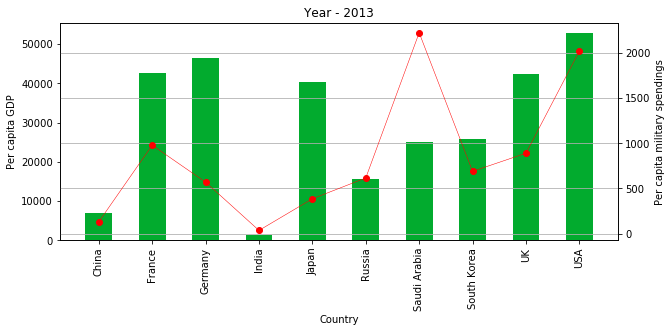

        Country     G2014    M2014
0         China   7683.50   146.61
1        France  42955.24   992.08
2       Germany  47902.65   571.67
3         India   1573.12    39.31
4         Japan  38096.21   367.80
5        Russia  14125.91   590.51
6  Saudi Arabia  24575.40  2614.81
7   South Korea  27811.37   744.62
8            UK  46412.12   919.97
9           USA  54598.55  1909.27


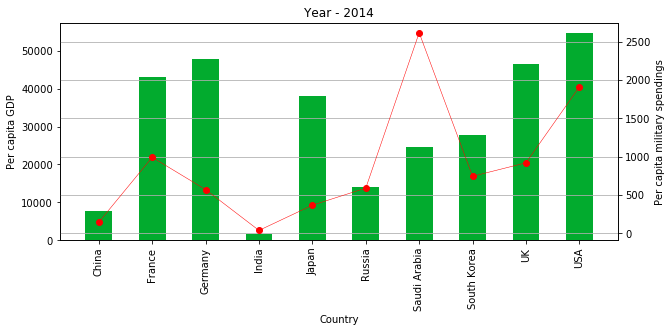

        Country     G2015    M2015
0         China   8069.21   155.59
1        France  36526.77   859.41
2       Germany  41176.88   493.41
3         India   1613.19    39.13
4         Japan  34474.14   324.74
5        Russia   9329.30   462.99
6  Saudi Arabia  20732.86  2764.26
7   South Korea  27105.08   724.40
8            UK  43929.69   832.29
9           USA  56207.04  1852.26


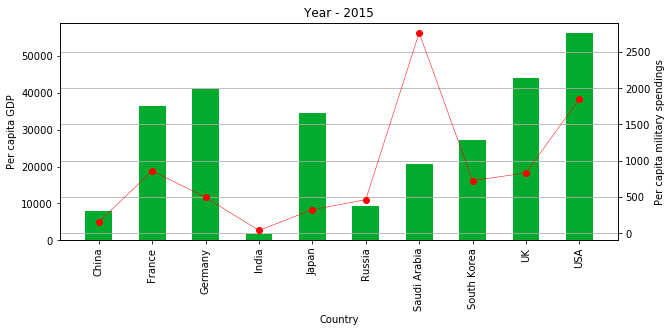

        Country     G2016    M2016
0         China   8123.18   155.74
1        France  36854.97   862.36
2       Germany  41936.06   509.33
3         India   1709.39    42.14
4         Japan  38894.47   365.40
5        Russia   8748.36   483.11
6  Saudi Arabia  20028.65  1978.19
7   South Korea  27538.81   728.80
8            UK  39899.39   741.31
9           USA  57466.79  1886.16


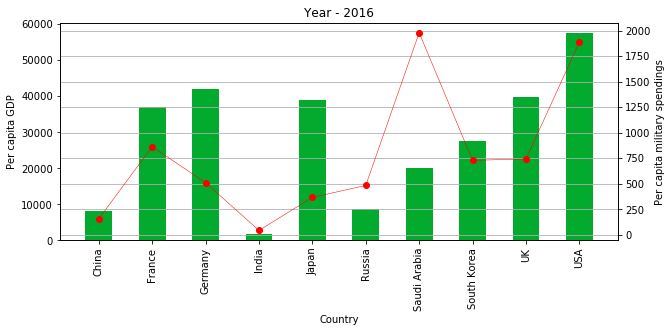

In [23]:
######### PLOTTING CHARTS FOR COMPARISON OF PER CAPITA GDP VS PER CAPITA MILITARY SPENDINGS (2012-2016) ################

### rename per_capita_gdp_top10 columns to G2012, G2013 .....  G represents the year for per capita GDP
### rename sipri_percapita_top10 columns to M2012, M2013 ..... M represents the year for per capita military spendings

a = per_capita_gdp_top10.rename(columns = {'2012': 'G2012', '2013':'G2013', '2014':'G2014', '2015':'G2015', '2016':'G2016'})
b = sipri_percapita_top10.rename(columns = {'2012': 'M2012', '2013':'M2013', '2014':'M2014', '2015':'M2015', '2016':'M2016'})

#PLOT CHARTS AND TABLES FROM 2012-2016
for i in range(1,6):
    chk1 =  a.iloc[:, [0,i]]
    chk2 =  b.iloc[:, [0,i]]
    check = chk1.merge(chk2, left_on='Country', right_on = 'Country')
    print(check)
    check = check.set_index('Country')
    fig = plt.subplots( figsize=(10,4) )
    ax = check.iloc[:,0].plot(kind='bar', use_index=True, color = "xkcd:kelly green")
    ax2 = ax.twinx()
    ax2.plot(check.iloc[:,1].values,linestyle='-', marker='o', linewidth=0.5, color='r')
    ax.set_title("Year - %d" % + float(i+2011))
    ax.set_ylabel("Per capita GDP")
    ax2.set_ylabel("Per capita military spendings")
    plt.grid()
    plt.show()


In [24]:
# ###########     Single out the fastest growing countries in military spending in fixed value and in percentage  ##########
# # REMINDER : final dataset was the clean version of countries showing their military expenditures from 2012 to 2016

# #Create columns with value and % change
final['Value Change from 2015 to 2016'] = np.round(final['2016']-final['2015'], 2)
final['Percent Change from 2015 to 2016'] = np.round(final['Value Change from 2015 to 2016']/final['2015'] *100, 2)
final = final.replace({'Russian Federation':'Russia',  'China, P.R.':'China'})
final.head()

,Country,2012,2013,2014,2015,2016,Total,Value Change from 2015 to 2016,Percent Change from 2015 to 2016
71,USA,684780.000000,639704.000000,609914.000000,596009.639000,611186.443000,3.141594e+06,15176.80,2.55
92,China,157390.377246,179880.451358,200772.203840,214093.069946,215175.930112,9.673120e+05,1082.86,0.51
150,Russia,81469.399931,88352.896464,84696.504653,66418.708184,69245.309461,3.901828e+05,2826.60,4.26
185,Saudi Arabia,56497.866667,67020.000000,80762.400000,87185.866667,63672.800000,3.551389e+05,-23513.07,-26.97
159,France,60035.153811,62417.099178,63613.569143,55342.131529,55745.475500,2.971534e+05,403.34,0.73


In [25]:
# FIXED VALUE 
fixed_value = final.sort_values('Value Change from 2015 to 2016', ascending = False)
fixed_value = fixed_value.head(10)
#Change the index column to start from 0
fixed_value.index = range(len(fixed_value))
fixed_value = fixed_value.set_index('Country')
fixed_value

,2012,2013,2014,2015,2016,Total,Value Change from 2015 to 2016,Percent Change from 2015 to 2016
Country,,,,,,,,
USA,684780.000000,639704.000000,609914.000000,596009.639000,611186.443000,3.141594e+06,15176.80,2.55
Japan,60011.530195,49023.932407,46634.511062,41103.226466,46126.327551,2.428995e+05,5023.10,12.22
India,47216.920048,47403.528801,50914.108341,51295.483754,55923.169804,2.527532e+05,4627.69,9.02
Venezuela,4965.612105,5313.527206,5576.517581,5264.791063,9222.050226,3.034250e+04,3957.26,75.16
Russia,81469.399931,88352.896464,84696.504653,66418.708184,69245.309461,3.901828e+05,2826.60,4.26
Italy,33732.753946,33891.913925,31572.443580,25294.630143,27933.794293,1.524255e+05,2639.16,10.43
Iran,16493.963287,11997.186984,9901.105170,10588.769671,12685.013770,6.166604e+04,2096.24,19.80
Germany,46470.870905,45930.540563,46102.673010,39812.576245,41067.464816,2.193841e+05,1254.89,3.15
Israel,14741.904033,16873.792054,18106.071651,16763.532475,17976.985687,8.446229e+04,1213.45,7.24


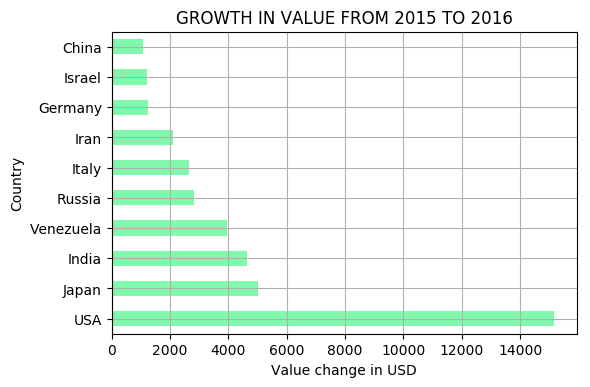

In [26]:
#PLOT FIXED VALUE
fig = plt.figure(dpi = 100)
ax = fixed_value['Value Change from 2015 to 2016'].plot(kind='barh', use_index=True, color = "xkcd:seafoam")
ax.set_xlabel("Value change in USD")
ax.set_title("GROWTH IN VALUE FROM 2015 TO 2016")
plt.grid()
plt.show()

In [27]:
# PERCENT CHANGE
percent_change = final.sort_values('Percent Change from 2015 to 2016', ascending = False)
percent_change = percent_change.head(10)
#Change the index column to start from 0
percent_change.index = range(len(percent_change))
percent_change = percent_change.set_index('Country')
percent_change

,2012,2013,2014,2015,2016,Total,Value Change from 2015 to 2016,Percent Change from 2015 to 2016
Country,,,,,,,,
Venezuela,4965.612105,5313.527206,5576.517581,5264.791063,9222.050226,30342.498181,3957.26,75.16
Latvia,255.740343,283.568933,295.728965,282.688256,406.859305,1524.585802,124.17,43.92
Lithuania,328.631682,354.862150,426.900272,471.221027,636.111640,2217.726770,164.89,34.99
Botswana,326.874162,306.438574,346.281450,383.739878,514.463449,1877.797512,130.72,34.06
Moldova,23.870073,26.710522,27.565619,23.051815,29.656361,130.854389,6.60,28.63
Montenegro,67.712201,64.836243,67.544018,55.545082,67.188739,322.826283,11.64,20.96
Iran,16493.963287,11997.186984,9901.105170,10588.769671,12685.013770,61666.038882,2096.24,19.80
Mali,148.865780,153.833698,218.118382,309.170682,368.751424,1198.739966,59.58,19.27
Kuwait,5941.536637,5698.067233,5832.249789,5502.906977,6560.742730,29535.503365,1057.84,19.22


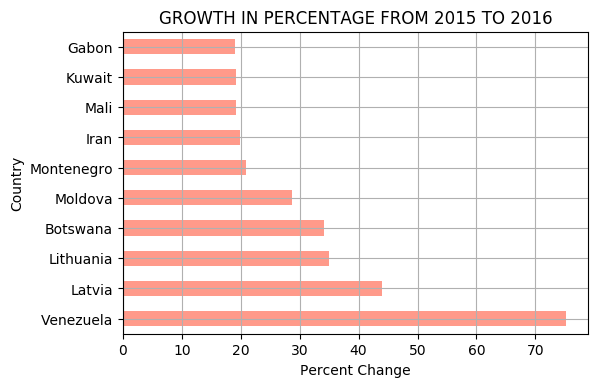

In [28]:
#PLOT PERCENT CHANGE
fig = plt.figure(dpi = 100)
ax = percent_change['Percent Change from 2015 to 2016'].plot(kind='barh', use_index=True, color = "xkcd:peachy pink")
ax.set_xlabel("Percent Change")
ax.set_title("GROWTH IN PERCENTAGE FROM 2015 TO 2016")
plt.grid()
plt.show()